   # Lending Club - Case Study
   ### By UPENDRA DAMA & ARVIND WALIA

In [5]:
##Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Importing required libraries for this case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [6]:
loan = pd.read_csv("~/Desktop/IIITB/Assignments_IIITB/Lending Club Case Study/loan.csv")
loan.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
##Let's see the total number of columns and rows of the dataframe
loan.shape

(39717, 111)

# Data Cleansing

In [8]:
##Let's see the information of dataset
loan.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null ob

## Let's divide the variables into three categories.
1. Application Variables

    * addr_state
    * annual_inc
    * annual_inc_joint
    * desc
    * emp_length
    * emp_title
    * home_ownership
    * zip_code
    * title
    * purpose

    
    
2. Loan Variables
    
    * All remaining varibales will come under loan variables
    
    
3. Loan Behavior Variables
   - These are the variables which come after the loan is approved. Hence these are not usful for our case study. We can drop these columns. 

    * delinq_2yrs
    * earliest_cr_line
    * inq_last_6mths
    * open_acc
    * pub_rec
    * revol_bal
    * revol_util
    * total_acc
    * out_prncp
    * out_prncp_inv
    * total_pymnt
    * total_pymnt_inv
    * total_rec_prncp
    * total_rec_int
    * total_rec_late_fee
    * recoveries
    * collection_recovery_fee
    * last_pymnt_d
    * last_pymnt_amnt
    * last_credit_pull_d
    * application_type

In [9]:
##Let's drop loan behvaiour variables
drop = ['delinq_2yrs','application_type','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
        'total_rec_late_fee','open_acc','pub_rec','total_acc','inq_last_6mths',
        'collection_recovery_fee','recoveries','last_pymnt_d','last_pymnt_amnt',
        'last_credit_pull_d', 'out_prncp','out_prncp_inv','revol_bal','revol_util','earliest_cr_line']
loan = loan.drop(drop,axis=1)
loan.shape

(39717, 90)

After having quick look at the data we see below varibales are not useful for our inestigation.So we can drop them.

- Futher varibales to drop.
    * ID 
    * Member ID
    * desc
    * Payment Plan (Because all rows are with value 'n')
    * URL 
    * ZIP Code
    * initial_list_status (Because all rows are with value 'f')
    * collections_12_mths_ex_med (All rows have either 0 or Null)
    * Policy code (all rows are with value '1')
    * acc_now_delinq (All rows are with Zeroes)
    * chargeoff_within_12_mths (All rows are with either 0 or Null)
    * delinq_amnt(All rows are with zeroes)
    * tax_liens (All rows are with Zeroes)

In [10]:
drop = ['id','member_id','desc','pymnt_plan','url','zip_code','initial_list_status', 
                   'collections_12_mths_ex_med','policy_code','acc_now_delinq',
                   'chargeoff_within_12_mths', 'delinq_amnt','tax_liens']
loan = loan.drop(drop,axis=1)
loan.shape

(39717, 77)

In [11]:
##Let's see if there are any NULL values in the dataframe
total = loan.isnull().sum().sort_values(ascending=False)
percent = (loan.isnull().sum()/loan.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['total', 'percent'])
missing_data.head()

,total,percent
total_il_high_credit_limit,39717,1.0
mo_sin_old_rev_tl_op,39717,1.0
bc_util,39717,1.0
bc_open_to_buy,39717,1.0
avg_cur_bal,39717,1.0


In [12]:
##Let's find the columns which are having more than 90% null values
null_gr90 = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(null_gr90)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [13]:
##Let's drop all the above coulmns which are having greater than 90% NULL Values
loan = loan.drop(columns = null_gr90, axis=1)
loan.shape

(39717, 21)

In [14]:
##Let's see if there are any NULL values in the dataframe
total = loan.isnull().sum().sort_values(ascending=False)
percent = (loan.isnull().sum()/loan.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['total', 'percent'])
missing_data.head()

,total,percent
mths_since_last_delinq,25682,0.646625
emp_title,2459,0.061913
emp_length,1075,0.027066
pub_rec_bankruptcies,697,0.017549
title,11,0.000277


In [15]:
##let's check how can we impute the column mths_since_last_delinq
##let's describe this column to see the distribution of the data
loan.mths_since_last_delinq.describe()

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [17]:
## Since mean and median are almost close, let's fill mths_since_last_delinq with mean and see the distribution.
loan.mths_since_last_delinq = loan['mths_since_last_delinq'].fillna(loan['mths_since_last_delinq'].mean()) 
loan.mths_since_last_delinq.describe()

count    39717.000000
mean        35.900962
std         13.089603
min          0.000000
25%         35.900962
50%         35.900962
75%         35.900962
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [18]:
##If we see above NULL value % results, emp_title is having more than 5%. 
##So, we will impute this with some common description such as Not Avaiable or unemployed. 
##Also remaining columns with null values can be removed because they have less than 5% of null values.

loan.emp_title.fillna(value='Not Available',inplace=True) 
loan = loan.dropna(how='any',axis=0) 

total = loan.isnull().sum().sort_values(ascending=False)
percent = (loan.isnull().sum()/loan.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['total', 'percent'])
missing_data.head()

,total,percent
pub_rec_bankruptcies,0,0.0
emp_length,0,0.0
funded_amnt,0,0.0
funded_amnt_inv,0,0.0
term,0,0.0


In [19]:
##let's see the structure of the data
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37935 entries, 0 to 39680
Data columns (total 21 columns):
loan_amnt                 37935 non-null int64
funded_amnt               37935 non-null int64
funded_amnt_inv           37935 non-null float64
term                      37935 non-null object
int_rate                  37935 non-null object
installment               37935 non-null float64
grade                     37935 non-null object
sub_grade                 37935 non-null object
emp_title                 37935 non-null object
emp_length                37935 non-null object
home_ownership            37935 non-null object
annual_inc                37935 non-null float64
verification_status       37935 non-null object
issue_d                   37935 non-null object
loan_status               37935 non-null object
purpose                   37935 non-null object
title                     37935 non-null object
addr_state                37935 non-null object
dti                       

In [20]:
## There are few columns for which type is object. Let's validate and convert them if required.
#1. int_rate
#2. issue_d 

##Let's remove % symbol from int rate 
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')

##Let's convert the issue_d  to datetime format.
df_yymmm = loan['issue_d'].str.partition("-", True)     
loan['issue_d_month']=df_yymmm[0]                     
loan['issue_d_year']='20' + df_yymmm[2]

loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,issue_d,loan_status,purpose,title,addr_state,dti,mths_since_last_delinq,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Not Available,10+ years,...,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,35.900962,0.0,Dec,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,Dec-11,Charged Off,car,bike,GA,1.00,35.900962,0.0,Dec,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Not Available,10+ years,...,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,35.900962,0.0,Dec,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Dec-11,Fully Paid,other,personel,CA,20.00,35.000000,0.0,Dec,2011
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,Dec-11,Current,other,Personal,OR,17.94,38.000000,0.0,Dec,2011


# Data Analysis

In [21]:
## Let's see what is present in Loan Status column
loan['loan_status'].value_counts()

Fully Paid     31557
Charged Off     5280
Current         1098
Name: loan_status, dtype: int64

### Analysis on Loan Status 

This is our target column and it has three categories. For our analysis status with 'Current' is not useful. So, let's drop all the rows with loan status 'Current'.

Since this is target column and also categorial,let's convert this to numeric by assigning '1' to 'Charged Off' and '0' to 'Fully Paid'.

In [22]:
loan_final = loan[loan['loan_status'] != 'Current']
loan_final['loan_status'] = loan_final['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

loan_final['loan_status'].value_counts()

0    31557
1     5280
Name: loan_status, dtype: int64

## Univariate Analysis

### Segmented Univariate Analysis

Let's do segmented univariate analysis for below variables. Because they are continuous in nature.

1. Annual Income
2. Interest Rate
3. Debt to Income
4. Installment
5. Loan Amount
6. Funded Amount  
7. Funded Amount committed by Investors

In [23]:
## Since above variables are continuous in nature, let's arrange them in BINs for easy visulaization

## Loan Amount, Funded Amount and Funded Amount by Investors
bin_range = [1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
label = ['1000-5000', '5000-10000', '10000-15000', '15000-20000','20000-25000','25000-30000','30000-35000']
loan_final['loan_amnt_bin'] = pd.cut(loan_final['loan_amnt'], bin_range, labels=label)
loan_final['funded_amnt_bin'] = pd.cut(loan_final['funded_amnt'], bin_range, labels=label)
loan_final['funded_amnt_inv_bin'] = pd.cut(loan_final['funded_amnt_inv'], bin_range, labels=label)

## Debt to Income
bin_range = [0, 10, 15, 20, 25, 30]
label = ['0-10', '10-15', '15-20', '20-25', '25-30']
loan_final['dti_bin'] = pd.cut(loan_final['dti'], bin_range, labels=label)

##Installment
bin_range = [0, 100, 500, 1000, 1500]
label = ['0-100', '100-500', '500-1000', '1000-1500']
loan_final['install_bin'] = pd.cut(loan_final['installment'], bin_range, labels=label)

##Interest Rate
bin_range = [0, 5, 10, 15, 20, 25]
label = ['0-5', '5-10', '10-15', '15-20', '20-25']
loan_final['int_rate_bin'] = pd.cut(loan_final['int_rate'], bin_range, labels=label)

## Annual Income
bin_range = [0, 25000, 50000, 75000, 100000, 150000]
label = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan_final['annual_inc_bin'] = pd.cut(loan_final['annual_inc'], bin_range, labels=label)


#### Now let's do univariate analysis for important varibles with target varibale loan status.

### 1. Loan Status vs Grade/Sub Grade/Loan Term/Home Ownership

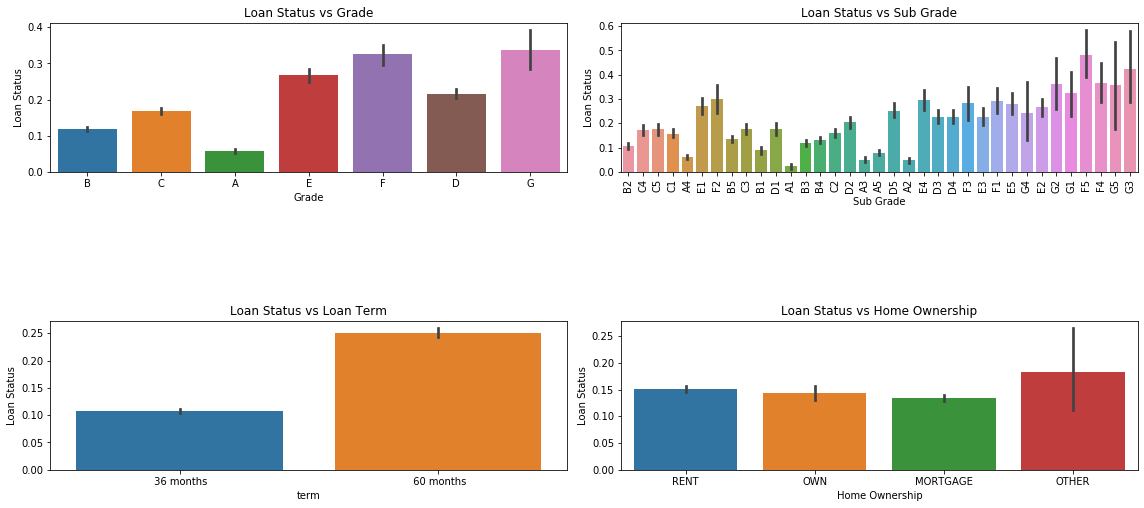

In [24]:
##Let's plot barplots for Grade, subgrade, Term and Home Ownership with Loan status.

plt.figure(figsize=(16,15))

plt.subplot(4,2,1)
sns.barplot(y='loan_status', x='grade', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Grade')
plt.title('Loan Status vs Grade')

plt.subplot(4,2,2)
sns.barplot(y='loan_status', x='sub_grade', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Sub Grade')
plt.xticks(rotation=90)
plt.title('Loan Status vs Sub Grade')

plt.subplot(4,2,3)
sns.barplot(y='loan_status', x='term', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('term')
plt.title('Loan Status vs Loan Term')

plt.subplot(4,2,4)
sns.barplot(y='loan_status', x='home_ownership', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Home Ownership')
plt.title('Loan Status vs Home Ownership')

plt.tight_layout()
plt.subplots_adjust(hspace=1)
plt.show()

#### Observations from above plot:- 
   
    1. % of defaulters is increased from grade A to grade G and it is high for loan grade G.
    2. Percentage of defaulters are relatively increased from sub grade A1 to sub grade G3. However,we can see 
       that % of defaulters are high for  sub grade F5.
    3. Percentage of defaulters are high with loan Term.
    4. Defaulters are high for homeownership as 'Other'. If we don't consider other, defaulters are high for
       Borrowers who are staying for rent. 
    

### 2. Loan Status vs Purpose/Issued Year/State/Public Record Bankruptcies

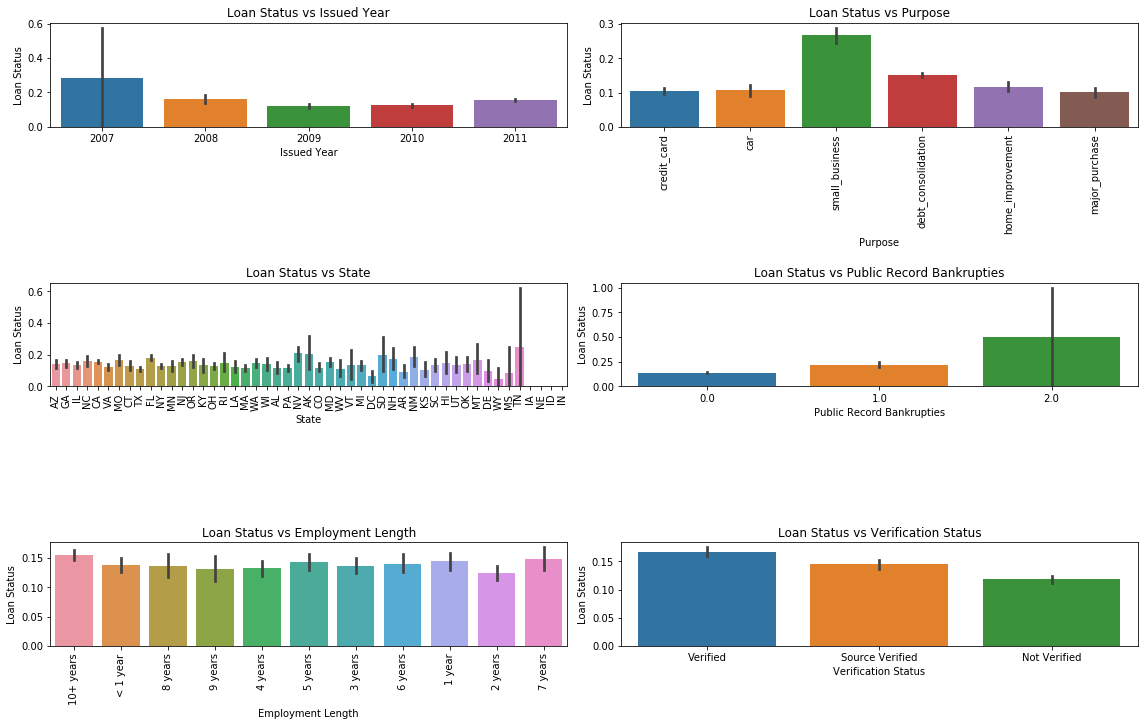

In [43]:
##Let's plot barplots for Issued Year, State, Purpose and Public Record Bankruptcies with Loan status.

plt.figure(figsize=(16,20))

plt.subplot(6,2,1)
sns.barplot(y='loan_status', x='issue_d_year', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Issued Year')
plt.title('Loan Status vs Issued Year')

plt.subplot(6,2,2)
sns.barplot(y='loan_status', x='purpose', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Purpose')
plt.xticks(rotation=90)
plt.title('Loan Status vs Purpose')

plt.subplot(6,2,3)
sns.barplot(y='loan_status', x='addr_state', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.title('Loan Status vs State')

plt.subplot(6,2,4)
sns.barplot(y='loan_status', x='pub_rec_bankruptcies', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Public Record Bankrupties')
plt.title('Loan Status vs Public Record Bankrupties')

plt.subplot(6,2,5)
sns.barplot(y='loan_status', x='emp_length', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Employment Length')
plt.xticks(rotation=90)
plt.title('Loan Status vs Employment Length')

plt.subplot(6,2,6)
sns.barplot(y='loan_status', x='verification_status', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Verification Status')
plt.title('Loan Status vs Verification Status')

plt.tight_layout()
plt.subplots_adjust(hspace=1.5)
plt.show()

#### Observations from above plot:- 
   
    1. % of defaulters are high in year 2007 and then gradually decreased and in 2011 increased again.
    2. Percentage of defaulters are high for borrowers who run small business
    3. Percentage of defaulters are high in state TN. There are no defaulters in the states NE,ID and IN.
    4. Defaulters are high for borrowers who has pubic record bankruptcies equal to '2'
    5. There is no specific pattern obeserved for length of employment with Loan Status
    6. Borrowers who are verified by lending club are tend to more defaulters
    

### 3. Loan Status vs Loan Amount/Funded Amount/Funded Amount by Investors/dti/annual income/Int Rate

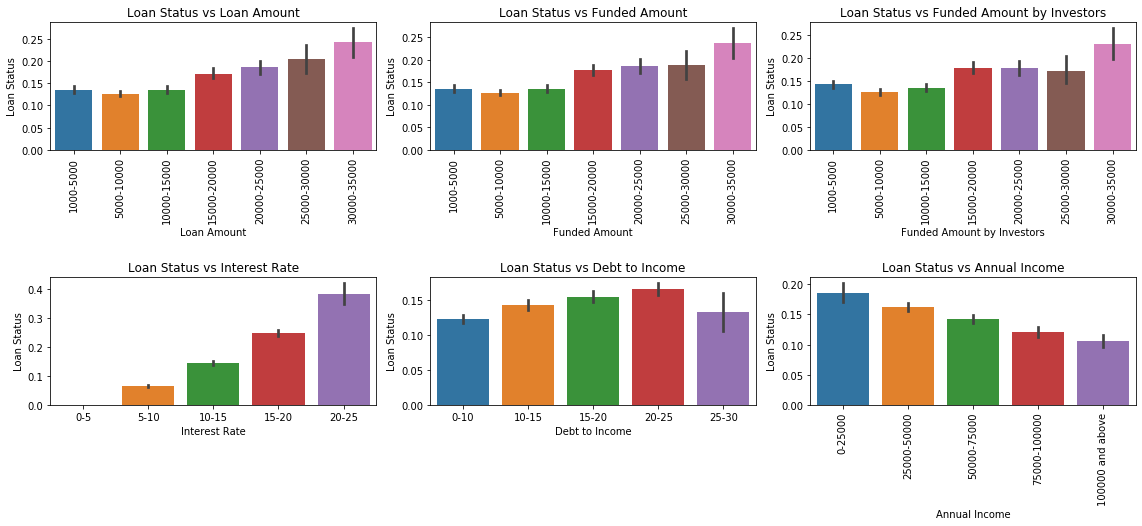

In [26]:
## Let's plot a bar plot between Loan status and Loan Amount, Funded Amount, Funded Amount by Investors, dti
## annual income and Int Rate

plt.figure(figsize=(16,20))

plt.subplot(6,3,1)
sns.barplot(y='loan_status', x='loan_amnt_bin', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Loan Amount')
plt.xticks(rotation=90)
plt.title('Loan Status vs Loan Amount')

plt.subplot(6,3,2)
sns.barplot(y='loan_status', x='funded_amnt_bin', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Funded Amount')
plt.xticks(rotation=90)
plt.title('Loan Status vs Funded Amount')

plt.subplot(6,3,3)
sns.barplot(y='loan_status', x='funded_amnt_inv_bin', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Funded Amount by Investors')
plt.xticks(rotation=90)
plt.title('Loan Status vs Funded Amount by Investors')

plt.subplot(6,3,4)
sns.barplot(y='loan_status', x='int_rate_bin', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Interest Rate')
plt.title('Loan Status vs Interest Rate')

plt.subplot(6,3,5)
sns.barplot(y='loan_status', x='dti_bin', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Debt to Income')
plt.title('Loan Status vs Debt to Income')

plt.subplot(6,3,6)
sns.barplot(y='loan_status', x='annual_inc_bin', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Annual Income')
plt.xticks(rotation=90)
plt.title('Loan Status vs Annual Income')

plt.tight_layout()
plt.subplots_adjust(hspace=1)
plt.show()

#### Observations from above plot:- 
   
    1. Percentage of defaulters are high for borrowers who took loan amount between 30k to 35k.
    2. Percentage of defaulters are high for borrowers who are funded with amount between 30k to 35k.
    3. Percentage of defaulters are high for borrowers who are funded by investors with amount between 30 to 35k
    4. % of defaulters are high for the borrowers who took loan at interest rate between 20 to 25%.
    5. % of defaulters are high for the borrowers who has debt to income between 20 to 25.
    6. % of defaulters are high for the borrowers who has annual income less than 25K.

## Bivariate Analysis

### 1. Loan Status vs Term and Purpose

    * Let's do bivariate analysis for other varibales with purpose and loan status. 
    * Firstly let's find the number of loans taken for each purpose and concentate on top 6 purposes. 
    * Because there is considerbale count for them. 
    * We can exclude other category since we don't know what it is.

In [27]:
## Let's see for which purpose the maximum loans have been taken.

loan_final['purpose'].value_counts()

debt_consolidation    17381
credit_card            4800
other                  3606
home_improvement       2737
major_purchase         2060
small_business         1656
car                    1431
wedding                 894
medical                 647
moving                  543
house                   349
vacation                342
educational             297
renewable_energy         94
Name: purpose, dtype: int64

In [28]:
##let's do bivarite analysis with top 6 purposes. Because there is considerbale count for them.
##We can exclude other category since we don't know what it is.

purpose_top6 = ['debt_consolidation','credit_card','home_improvement','major_purchase','small_business','car']
loan_final = loan_final[loan_final['purpose'].isin(purpose_top6)]

loan_final['purpose'].value_counts()

debt_consolidation    17381
credit_card            4800
home_improvement       2737
major_purchase         2060
small_business         1656
car                    1431
Name: purpose, dtype: int64

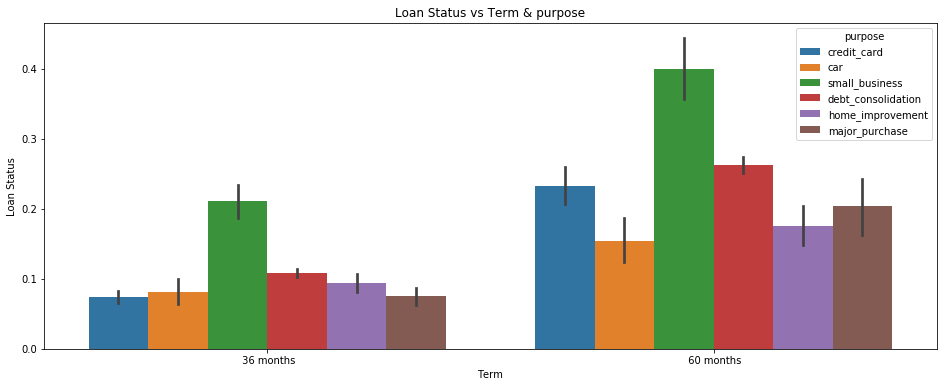

In [29]:
## Let's plot a barplot between loan status vs Loan amount and Purpose

plt.figure(figsize=(16,6))

sns.barplot(x='term', y='loan_status', hue='purpose', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Term')
plt.title('Loan Status vs Term & purpose')

plt.show()

  #### Observations from above plot:- 
    
      * For the loan term 30 and 60 months, we can see that percentage of defaulters are more who took loan 
        for small business and then debt consolidation. 

### 2. Loan Status vs Loan Amount and Purpose

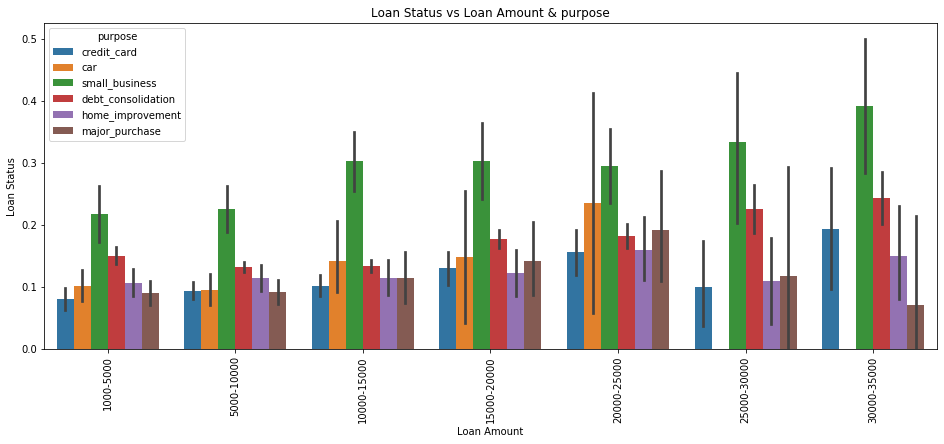

In [30]:
## Let's plot a barplot between loan status vs Loan amount and Purpose

plt.figure(figsize=(16,6))

sns.barplot(x='loan_amnt_bin', y='loan_status', hue='purpose', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Loan Amount')
plt.xticks(rotation=90)
plt.title('Loan Status vs Loan Amount & purpose')
plt.show()

#### Observations from above plot:- 
   
        1. The borrowers whose loan amount is between 25k to 35k for small business are more defaulters.
   

### 3. Loan Status vs Year and Purpose

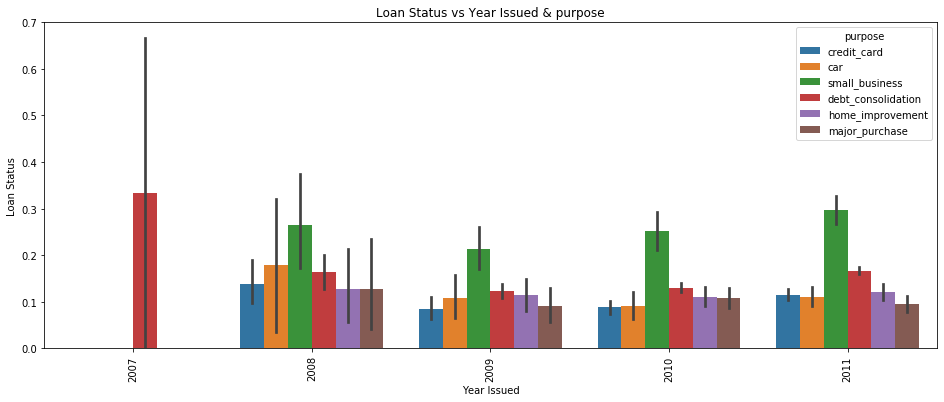

In [31]:
## Let's plot a barplot between loan status vs issued year and Purpose

plt.figure(figsize=(16,6))

sns.barplot(x='issue_d_year', y='loan_status', hue='purpose', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Year Issued')
plt.xticks(rotation=90)
plt.title('Loan Status vs Year Issued & purpose')
plt.show()

  #### Observations from above plot:- 
    
      * From the above plot we can see that most people who took loan in 2007 for debt consolidation are 
        more defaulters

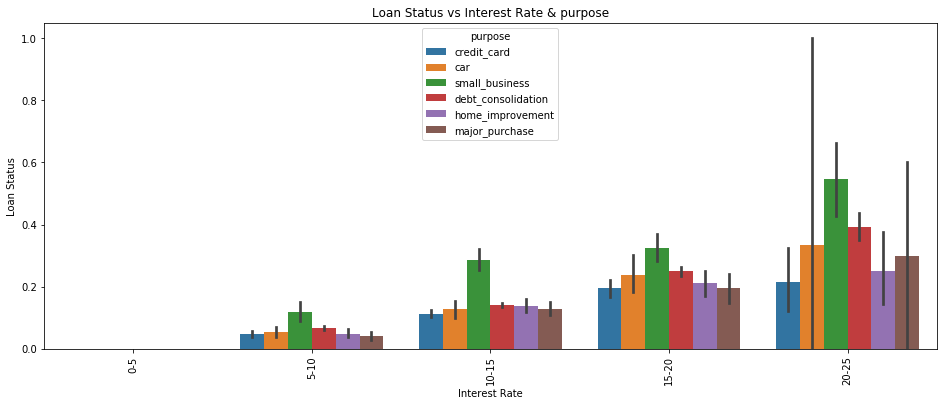

In [32]:
## Let's plot a barplot between Loan Status vs Interest rate and Purpose

plt.figure(figsize=(16,6))

sns.barplot(x='int_rate_bin', y='loan_status', hue='purpose', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Interest Rate')
plt.xticks(rotation=90)
plt.title('Loan Status vs Interest Rate & purpose')
plt.show()

  #### Observations from above plot:- 
    
      * From the above plot we can see that irrespective of the purpose, the borrowers who took loan with 
        interest rate 20 to 25% are more defaulters. 

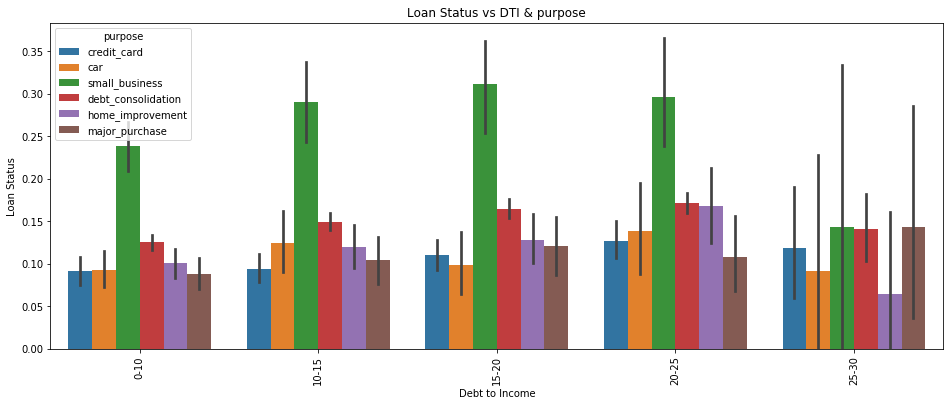

In [33]:
## Let's plot a barplot between Lon Status and dti and Purpose

plt.figure(figsize=(16,6))

sns.barplot(x='dti_bin', y='loan_status', hue='purpose', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Debt to Income')
plt.xticks(rotation=90)
plt.title('Loan Status vs DTI & purpose')
plt.show()

  #### Observations from above plot:- 
    
      * From the above plot we can see that the defaulters are less whose debt to income is in range of
        25 to 30 irrespective of the purpose of the loan. 
      * Irrespective of the DTI range, the default % is more for people who took loan for small business.

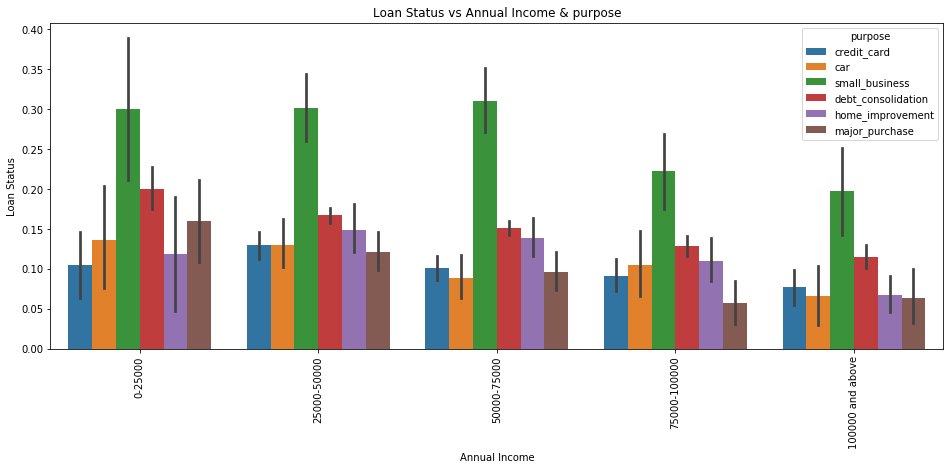

In [34]:
## Let's plot a barplot between Loan Status vs Annual Income and Purpose

plt.figure(figsize=(16,6))

sns.barplot(x='annual_inc_bin', y='loan_status', hue='purpose', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Annual Income')
plt.xticks(rotation=90)
plt.title('Loan Status vs Annual Income & purpose')
plt.show()

  #### Observations from above plot:- 
    
      * Irrespective of the annual income range, borrowers who took loan for small business are more defaulters.
      * After Small business, people who took loan for debt consolidation are more defaulters.
      * Default % is reletively less for the borrowers who has annual income greater than or equal to 100K 
        and less for whose annula income is less than equal to 2500.

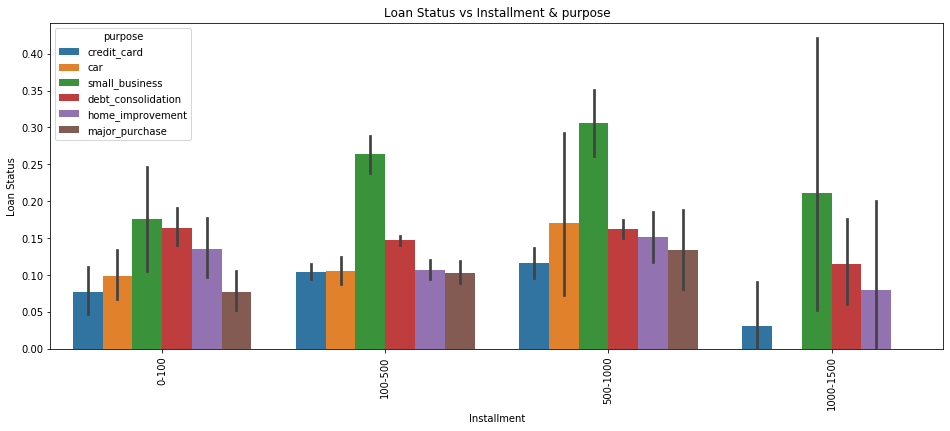

In [40]:
## Let's plot a barplot between Loan Status vs Installment and Purpose

plt.figure(figsize=(16,6))

sns.barplot(x='install_bin', y='loan_status', hue='purpose', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Installment')
plt.xticks(rotation=90)
plt.title('Loan Status vs Installment & purpose')
plt.show()

  #### Observations from above plot:- 
    
      * Default % is more for the borrowers who pay installments between 500 to 1000.
      * Irrespective of the installment, people took loan for small business are more defaulters.

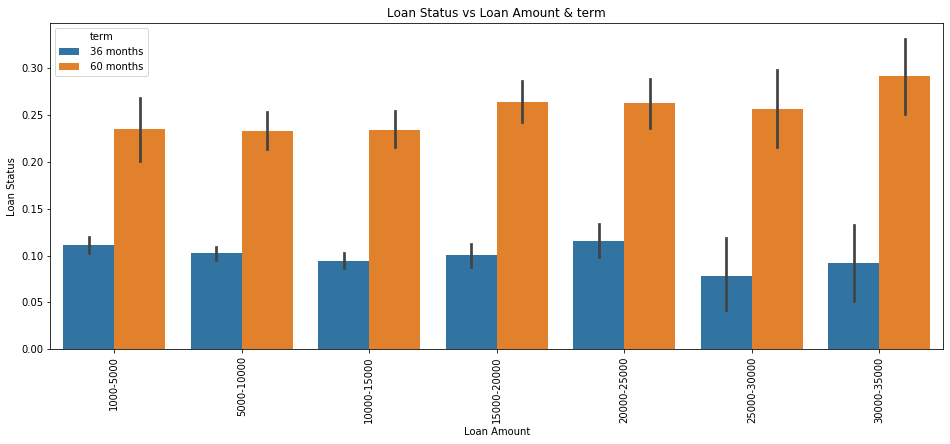

In [36]:
## Let's plot a barplot between Loan Status vs Loan amount and Term

plt.figure(figsize=(16,6))

sns.barplot(x='loan_amnt_bin', y='loan_status', hue='term', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Loan Amount')
plt.xticks(rotation=90)
plt.title('Loan Status vs Loan Amount & term')
plt.show()

  #### Observations from above plot:- 
    
      * Irrespective of the loan amount, people took loan for 60 month tenure are more defaulters.

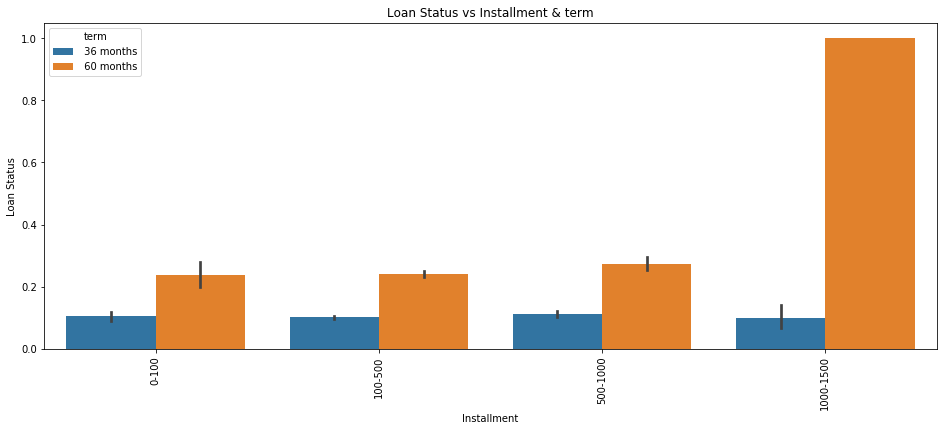

In [37]:
## Let's plot a barplot between Loan Status vs Installment and term

plt.figure(figsize=(16,6))

sns.barplot(x='install_bin', y='loan_status', hue='term', data=loan_final)
plt.ylabel('Loan Status')
plt.xlabel('Installment')
plt.xticks(rotation=90)
plt.title('Loan Status vs Installment & term')
plt.show()

  #### Observations from above plot:- 
    
      * Irrespective of the Interest Rate, people took loan for 60 month tenure are more defaulters.